   #                                      Pymaceuticals

In [259]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "Resources/mouse_drug_data.csv"
clinical_trial_data_to_load = "Resources/clinical_trial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data_pd = pd.read_csv(mouse_drug_data_to_load)
mouse_data_pd.head()
clinical_data_pd =pd.read_csv(clinical_trial_data_to_load)


# Combine the data into a single dataset
merge_table = pd.merge(mouse_data_pd, clinical_data_pd, on='Mouse ID')

# Display the data table for preview
merge_table.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [260]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint Reset index so all columns on same level
mean_tumor = merge_table.groupby(['Drug', 'Timepoint']).mean()['Tumor Volume (mm3)'].rename('Mean Tumor').reset_index()

# Convert to DataFrame
mean_tumor_df = pd.DataFrame(mean_tumor)
# Preview DataFrame
mean_tumor_df.head()

,Drug,Timepoint,Mean Tumor
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [261]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_tumor_volume = merge_table.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].sem().rename('SEM Tumor').reset_index()
# Convert to DataFrame
sem_tumor_volume_df = pd.DataFrame(sem_tumor_volume)
# Preview DataFrame
sem_tumor_volume_df.head()


,Drug,Timepoint,SEM Tumor
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [262]:
# Minor Data Munging to Re-Format the Data Frames use .pivot and set
mean_tumor_df.reset_index()
formated_mean = mean_tumor_df.pivot(index= 'Timepoint', columns = 'Drug')['Mean Tumor']

# Preview that Reformatting worked
formated_mean.head()



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [263]:
#Re-Fromat the SEM table using pivot
formated_sem =sem_tumor_volume_df.pivot(index = 'Timepoint', columns ="Drug", values ='SEM Tumor')
formated_sem.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


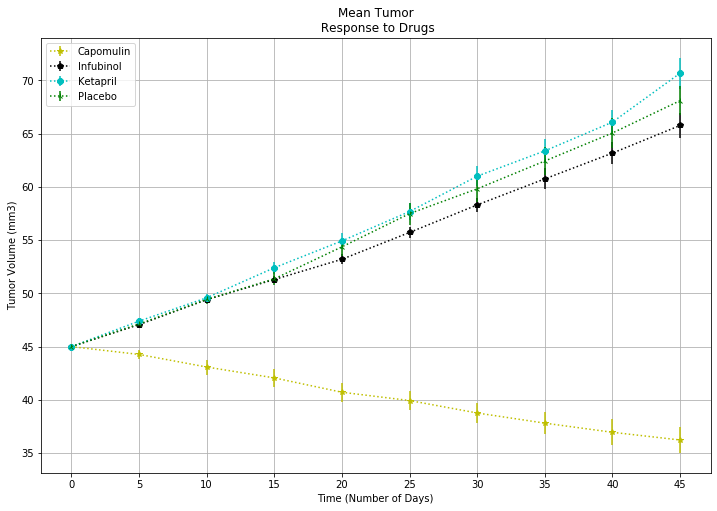

In [264]:

    
plt.figure(figsize = (12,8))
plt.xticks(np.arange(0,50,5))

#Make 2 list for values in for loop
marker = {"Capomulin":["*","y"],"Infubinol":["p","k"], "Ketapril":["8","c"], "Placebo":["2","g"]}
drug_list = ['Capomulin', 'Infubinol', 'Ketapril','Placebo']
for drug in drug_list:
    plt.errorbar(formated_mean.index, formated_mean[drug],formated_sem[drug], 
                linestyle = ":", color = marker[drug][1],marker=marker[drug][0])
plt.legend(marker)
plt.grid()
plt.title('Mean Tumor\n Response to Drugs')
plt.xlabel('Time (Number of Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.savefig('../Desktop/Pymaceuticals/Mean_Tumor_Response.png')
plt.show()


# Analysis Based on Tumor Size

Only Capomulin impacted tumor size in a statistically measurable way. Infubinol and Ketapril showed outcomes that were in line with the Placebo groups outcomes.

* The standard error measures demonstrated the failure of Infubinol and Ketapril.
* Capomulin significantly decreased the size of tumors.  It was the only drug with a negative slope on the y-axis.

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [265]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatic_data = merge_table.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean().rename('Metastatic').reset_index()

# Convert to DataFrame
metastatic_response_df = pd.DataFrame(metastatic_data)
# Preview DataFrame
metastatic_response_df.head()




,Drug,Timepoint,Metastatic
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [266]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_metastatic_tumor = merge_table.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].sem().rename('SEM Metastatic').reset_index()
# Convert to DataFrame
sem_metastatic_tumor_df = pd.DataFrame(sem_metastatic_tumor)
sem_metastatic_tumor_df.head()

# Preview DataFrame


,Drug,Timepoint,SEM Metastatic
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [267]:
# Minor Data Munging to Re-Format the Data Frames use pivot
formated_metastatic_response =metastatic_response_df.pivot(index='Timepoint', columns = 'Drug', values = 'Metastatic')
formated_SEM_metastatic = sem_metastatic_tumor_df.pivot(index = 'Timepoint', columns = 'Drug', values = 'SEM Metastatic')

# Preview that Reformatting worked
#formated_metastatic_respone.head()
formated_SEM_metastatic.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


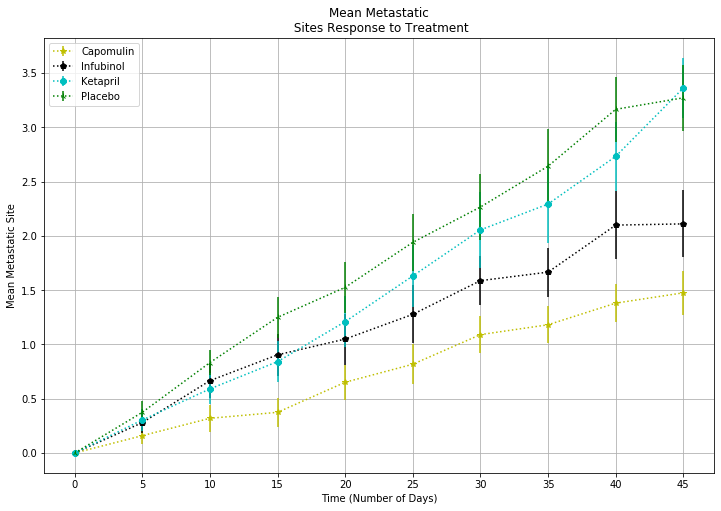

In [268]:
# Generate the Plot (with Error Bars)

marker = {"Capomulin":["*","y"],"Infubinol":["p","k"], "Ketapril":["8","c"], "Placebo":["2","g"]}
drug_list = ['Capomulin', 'Infubinol', 'Ketapril','Placebo']
plt.figure(figsize=(12,8))
#write for loop to generate graph
for drug in drug_list:
    plt.errorbar(formated_metastatic_response.index, formated_metastatic_response[drug],formated_SEM_metastatic[drug], 
                linestyle = ":", color = marker[drug][1],marker=marker[drug][0])
plt.xticks(np.arange(0,50,5))

plt.xlabel('Time (Number of Days)')
plt.ylabel('Mean Metastatic Site')
plt.legend(marker)
plt.title('Mean Metastatic\n Sites Response to Treatment')
plt.grid()    
# Save the Figure
plt.savefig('../Desktop/Pymaceuticals/Metastatic_response.png')
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [269]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count =merge_table.groupby(['Drug', 'Timepoint'],)['Mouse ID'].count().rename('Mouse Count').reset_index()
# Convert to DataFrame
mouse_count_df=pd.DataFrame(mouse_count)
# Preview DataFrame
mouse_count_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [270]:
# Minor Data Munging to Re-Format the Data Frames
formated_mouse_count = mouse_count_df.pivot(index = 'Timepoint', columns='Drug', values='Mouse Count')
formated_mouse_count.head()

# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


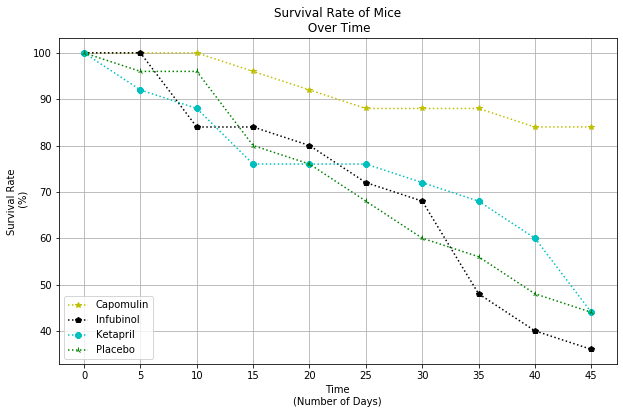

In [271]:
# Generate the Plot (Accounting for percentages)
marker = {"Capomulin":["*","y"],"Infubinol":["p","k"], "Ketapril":["8","c"], "Placebo":["2","g"]}
drug_list = ['Capomulin', 'Infubinol', 'Ketapril','Placebo']
plt.figure(figsize=(10,6))

for drug in drug_list:
    plt.plot(formated_mouse_count[drug]/formated_mouse_count[drug][0]*100,
            linestyle= ':', color = marker[drug][1], marker = marker[drug][0])
plt.legend(marker, loc=3)
plt.xticks(np.arange(0,50,5))
plt.grid()
plt.ylabel('Survival Rate\n (%)')
plt.title('Survival Rate of Mice\n Over Time')
plt.xlabel("Time\n(Number of Days)")
# Save the Figure
plt.savefig('../Desktop/Pymaceuticals/Mouse_survival_rate.png')
# Show the Figure
plt.show()

   # Survival Rate Conclusion

The survival rate of the mice undergoing the clinical trial did was not impacted by 2 of the three drugs tested.

- The [Ketapril] and [Placebo] ended with nearly an identical survival rate among the mice
- The [Infubinol] actually saw a higher mortality rate among the mice than seen with treatment from the [Placebo]
- The Mice treated with [Capomulin] survived at a rate nearly 40% higher than mice treated with other drugs.  

>It would have been interesting to see what happened beyond the 45 day mark.
>While [Ketapril] and [Infubinol] saw steep increases in the mortality rate
>from day 25 to 45, [Capomulin] actually showed the mortality rate was slowing.
>I would like to see if it contiuned to maintian survival rates in the 80th
>percentile after 45 days.





![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [272]:
# Calculate the percent changes for each drug(Use mean formated tumor data and subtract change at [0] from last [-1])
initial_tumor = formated_mean.iloc[0]
ending_tumor = formated_mean.iloc[-1]

#formula for change
change_percent = ((ending_tumor- initial_tumor)/initial_tumor)*100
change_percent_list = change_percent.tolist()

# Display the data to confirm


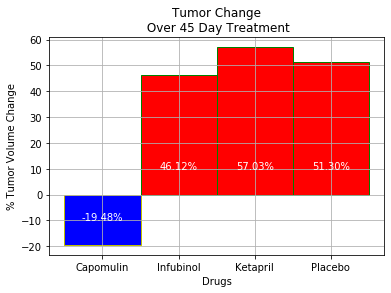

In [273]:
# Store all Relevant Percent Changes into a Tuple
#def convert_lst(lst):
    #return tuple(lst)
#tuple_change = convert_lst(change_percent_list)
#tuple_change
drug_list = ['Capomulin', 'Infubinol', 'Ketapril','Placebo']
# Splice the data between passing and failing drugs
passing_drug = change_percent[change_percent > 0].loc[drug_list].dropna(how='any')
failing_drug = change_percent[change_percent< 0].loc[drug_list].dropna(how='any')
# Orient widths. Add labels, tick marks, etc. 
x_axis= np.arange(len(drug_list))
plt.grid()
plt.xlabel('Drugs')
plt.ylabel('% Tumor Volume Change')
plt.xticks(x_axis, drug_list)
plt.title('Tumor Change\n Over 45 Day Treatment')

passing_plot = plt.bar(np.arange(len(failing_drug)),  list(failing_drug.values),width = 1, edgecolor="y",
                 align = "center",color = "b")
failing_plot = plt.bar(len(failing_drug)+np.arange(len(passing_drug)), list(passing_drug.values),
                 width = 1,edgecolor="g",align = "center",color = "r")



# Use functions to label the percentages of changes


# Call functions to implement the function calls
for drug in drug_list:
    if drug in list(failing_drug.index):
        plt.text(list(failing_drug.index).index(drug),-10, "{:,.2f}%".format(failing_drug[drug]),ha="center", color = "w")
    elif drug in list(passing_drug.index):
        #text in bars
        plt.text(len(failing_drug)+list(passing_drug.index).index(drug),10, "{:,.2f}%".format(passing_drug[drug]),
                 ha="center", color = "w")
    


# Save the Figure
plt.savefig('../Desktop/Pymaceuticals/Drug_success.png')

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/change.png)

# Final Thoughts

Through all of the testing, only Capomulin showed promise in the treatment of cancer.

* Based on the mortality rate and the increase in tumor size over the course of treatment, both Infubinol and Ketapril are similar to a Placebo.
* Capomulin significantly decreased the risk of death and showed promising results in reducing tumor size.  

>The treatments patient undergo while fighting cancer are not only hard on the body, they are extremely expensive.  Infubinol and Ketapril
>do not appear to be worth the time or money. 


